У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Set default parameters for LaTex and font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

path = 'data/yulu_rental.csv'
yulu_rental_df = pd.read_csv(path)

yulu_rental_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

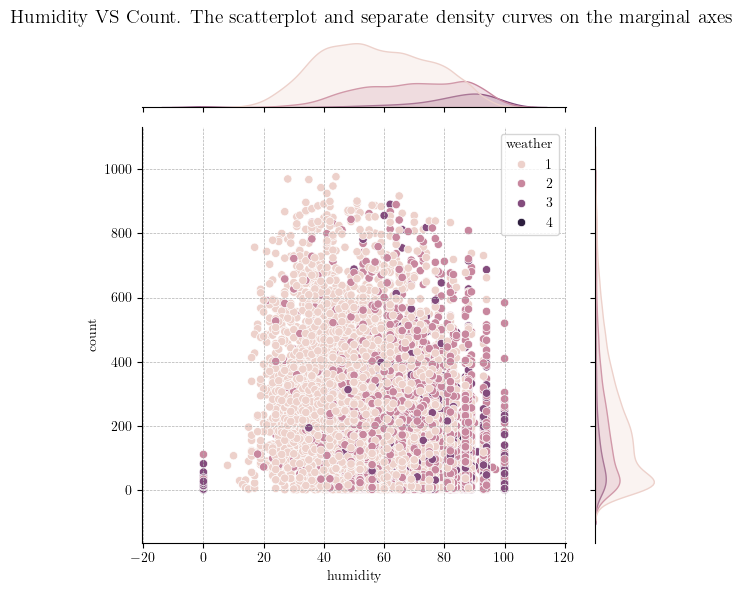

In [21]:
yulu_rental_scatter_humidity_count = sns.jointplot(data=yulu_rental_df, x='humidity', y='count', hue='weather')
yulu_rental_scatter_humidity_count.fig.suptitle(
    'Humidity VS Count. The scatterplot and separate density curves on the marginal axes',
    fontsize=14
)

yulu_rental_scatter_humidity_count.fig.tight_layout()
yulu_rental_scatter_humidity_count.fig.subplots_adjust(top=0.93) 

plt.grid(True, linestyle='--', linewidth=0.5)
plt.show();

<h1 style='font-family: Garamond;'>Графік розсіювання вологості (<code>humidity</code>) та кількості записів (<code>count</code>)</h1>
<hr></hr>

<strong>1. Опис графіка:</strong><br>
- **Горизонтальна вісь (X):** <code>humidity</code> (вологість), у діапазоні від 0 до 100%.<br>
- **Вертикальна вісь (Y):** <code>count</code> (кількість записів), до 1000.<br>
- **Колір точок:** Позначає різні категорії погоди (<code>weather</code>), з градацією кольорів від світло-рожевого до темно-фіолетового (категорії 1, 2, 3, 4).<br>
- **Додаткові графіки:** Маргінальні осі показують **щільність розподілу** вологості (зверху) та кількості записів (праворуч) для кожної категорії погоди.<br><br>

<strong>2. Основні спостереження:</strong><br>
- **Густина точок:**<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Найбільша кількість точок (записів) розташована у діапазоні вологості **40–100%**.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Кількість записів <code>count</code> здебільшого перебуває у межах **0–600**, але спостерігаються іші піки до 1000.<br>
- **Категорії погоди:**<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Категорії з темнішими кольорами (<code>3</code> і <code>4</code>) спостерігаються частіше за підвищеної вологості (~70–100%).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Категорія <code>1</code> (світліші кольори) більш розсіяна й охоплює ширший діапазон вологості.<br><br>

<strong>3. Розподіл на маргінальних осях:</strong><br>
- **Графік зверху:** Показує розподіл вологості. Розподіл має <strong>дві помітні моди</strong> — навколо 50% і 80–90%, що вказує на підвищену частоту цих значень.<br>
- **Графік праворуч:** Показує розподіл кількості записів. Щільність вказує на більшу частоту значень **від 200 до 600**, але є поодинокі максимуми до 1000 записів.<br><br>

<strong>4. Аномалії та особливості:</strong><br>
- Наявність великої кількості точок із **високою вологістю (>80%)** свідчить про стабільний вплив погоди на зростання кількості записів, що є не досить передбачуваним, проте на таку тенденцію можуть впливати зареєстровані користувачі, оскільки вони є стаблільною ЦА бізнесу.<br>
- **Категорія 4** (найтемніший колір) має вищу концентрацію у крайніх значеннях вологості, що може вказувати на специфічні погодні умови (наприклад, важкі умови або опади).<br><br>

<strong>5. Висновок:</strong><br>
- Взаємозв'язок між вологістю та кількістю записів не є лінійним, але показує залежність: збільшення вологості до **70–100%** часто супроводжується збільшенням кількості записів.<br>
- Розподіл за категоріями погоди демонструє вплив певних погодних умов на рівень активності.<br>
- Щільність даних на маргінальних осях підтверджує основні скупчення значень як для вологості, так і для кількості записів.


2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

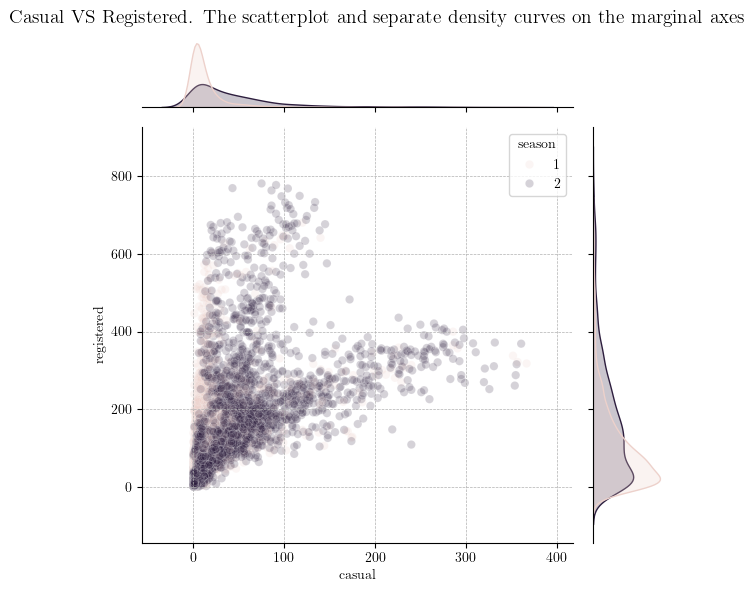

In [27]:
yulu_rental_summer_spring_df = yulu_rental_df[yulu_rental_df['season'].isin([1, 2])]
yulu_rental_summer_spring_df.head()

yulu_rental_summer_spring_users_comparisson = sns.jointplot(data=yulu_rental_summer_spring_df, x='casual', y='registered', alpha=0.2, hue='season')
yulu_rental_summer_spring_users_comparisson.fig.suptitle(
    'Casual VS Registered. The scatterplot and separate density curves on the marginal axes',
    fontsize=14
)

yulu_rental_summer_spring_users_comparisson.fig.tight_layout()
yulu_rental_summer_spring_users_comparisson.fig.subplots_adjust(top=0.93) 

plt.grid(True, linestyle='--', linewidth=0.5)
plt.show();

<h1 style='font-family: Garamond;'>Графік розсіювання: Випадкові користувачі (<code>casual</code>) та зареєстровані користувачі (<code>registered</code>)</h1>
<hr></hr>

<strong>1. Опис графіка:</strong><br>
- **Горизонтальна вісь (X):** <code>casual</code> — кількість випадкових користувачів (не зареєстровані).<br>
- **Вертикальна вісь (Y):** <code>registered</code> — кількість зареєстрованих користувачів.<br>
- **Колір точок:** Відповідає категоріям сезону (<code>season</code>), де:<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• <code>1 - Весна</code> (світліші точки)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• <code>2 - Літо</code> (темніші точки).<br>
- **Маргінальні осі:** Показують щільність розподілу значень для <code>casual</code> (зверху) та <code>registered</code> (праворуч).<br><br>

<strong>2. Основні спостереження:</strong><br>
- **Розташування точок:**<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Дані показують високу концентрацію точок для **низьких значень <code>casual</code> (0–50)** та **низьких-середніх значень <code>registered</code> (0–300)**.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• У діапазоні <code>casual > 100</code> кількість зареєстрованих користувачів зростає, але розкид точок збільшується.<br>
- **Щільність розподілу:**<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• На маргінальній осі зверху видно, що значення <code>casual</code> користувачів мають піки біля **0–50**.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Розподіл <code>registered</code> користувачів (збоку) є ширшим, із піком на **200–300** користувачів.<br><br>

<strong>3. Вплив сезону:</strong><br>
- Сезони позначені різними відтінками:<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Обидві категорії сезонів (<code>1</code> і <code>2</code>) мають схожу тенденцію: велика кількість значень для **низьких <code>casual</code> та <code>registered</code> користувачів**.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• У сезоні <code>2</code> (темніші точки) спостерігається трохи більше розсіювання точок для високих значень <code>casual</code> (> 200).<br><br>

<strong>4. Взаємозв'язок між змінними:</strong><br>
- Спостерігається **нелінійна кореляція** між кількістю випадкових користувачів (<code>casual</code>) та кількістю зареєстрованих користувачів (<code>registered</code>):<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• У низьких значеннях (<code>casual < 50</code>) кількість зареєстрованих користувачів може бути досить високою (~200–400).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Зі збільшенням <code>casual</code> розкид <code>registered</code> користувачів зростає, але тенденція вказує на насичення.<br><br>

<strong>5. Висновок:</strong><br>
- Більшість значень зосереджені у низькому діапазоні для казуальних користувачів (<code>casual</code>), тоді як кількість зареєстрованих користувачів (<code>registered</code>) може залишатися досить високою.<br>
- Взаємозв'язок між змінними показує тенденцію до зростання, але з великим розкидом для вищих значень <code>casual</code>.<br>
- Вплив сезону є мінімальним у нижніх діапазонах, але сезон <code>2 (Літо)</code> демонструє трохи більше значень у вищих діапазонах <code>casual</code>.


3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


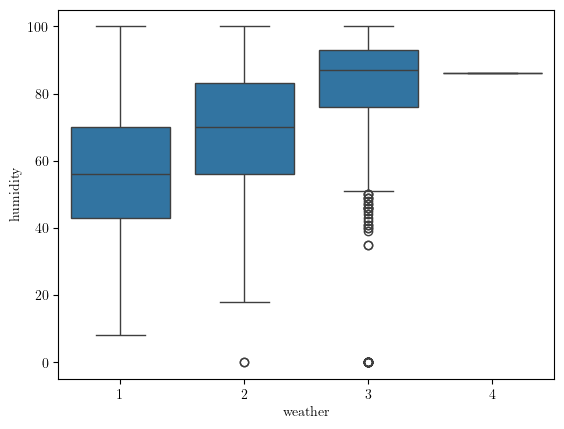

In [32]:
yulu_rental_df_boxplot = sns.boxplot(data=yulu_rental_df, x='weather', y='humidity')
plt.show();

4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

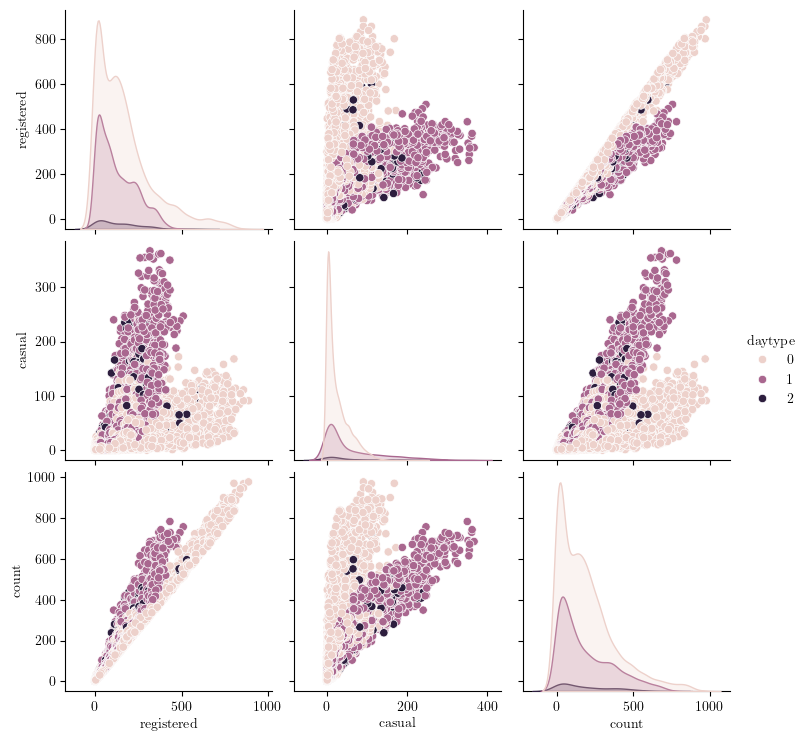

In [66]:
conditions = [
    yulu_rental_df['holiday'] == 1,  # holiday
    yulu_rental_df['workingday'] == 0,  # weekend
    yulu_rental_df['workingday'] == 1   # working day
]

choices = [2, 1, 0]  

yulu_rental_df['daytype'] = np.select(conditions, choices)

yulu_rental_filtered_df = yulu_rental_df[['registered', 'casual', 'count', 'daytype']]
yulu_rental_df_pairplot_users_comparison = sns.pairplot(data=yulu_rental_filtered_df, hue='daytype')

plt.show()

<h1 style='font-family: Garamond;'>Матриця діаграм розсіювання: Порівняння зареєстрованих, випадкових та загальних записів</h1>
<hr></hr>

<strong>1. Опис графіка:</strong><br>
- **Тип візуалізації:** Парні діаграми розсіювання (<em>pair plot</em>) із щільностями розподілу на діагональних комірках.<br>
- **Змінні:**<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• <code>registered</code> — кількість зареєстрованих користувачів.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• <code>casual</code> — кількість випадкових (не зареєстрованих) користувачів.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• <code>count</code> — загальна кількість користувачів.<br>
- **Категорії днів (<code>daytype</code>):**<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• 0 (світло-рожевий): Звичайний день.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• 1 (темно-рожевий): Вихідний.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• 2 (темно-фіолетовий): Святковий день.<br><br>

<strong>2. Основні спостереження:</strong><br>
- **Залежність між змінними:**<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Змінні <code>registered</code> та <code>count</code> мають сильну позитивну кореляцію — точки розташовані вздовж прямої лінії.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Між <code>casual</code> та <code>count</code> також спостерігається позитивний зв'язок, але із більшою розсіюваністю.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Кореляція між <code>registered</code> та <code>casual</code> є слабшою та має значно більший розкид точок.<br><br>

- **Розподіл на діагональних комірках:**<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Найбільша щільність для <code>registered</code> і <code>count</code> зосереджена в нижніх значеннях (~0–200).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Для <code>casual</code> щільність показує різкий спад після ~100 користувачів.<br><br>

- **Категорії днів (<code>daytype</code>):**<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Темніші точки (<code>daytype 2</code>) мають тенденцію з'являтися на вищих значеннях усіх трьох змінних (<code>count</code>, <code>registered</code>, <code>casual</code>).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Звичайні дні (<code>daytype 0</code>) мають найбільше значень у низьких діапазонах усіх показників.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;• Вихідні (<code>daytype 1</code>) демонструють ширший діапазон значень, особливо для <code>casual</code> користувачів.<br><br>

<strong>3. Виявлені патерни:</strong><br>
- Загальна кількість користувачів (<code>count</code>) значною мірою залежить від кількості зареєстрованих користувачів (<code>registered</code>).<br>
- Випадкові користувачі (<code>casual</code>) більш активні у вихідні та святкові дні.<br>
- Святкові дні (<code>daytype 2</code>) мають найбільші показники по всіх змінних, що вказує на підвищену активність користувачів.<br><br>

<strong>4. Висновок:</strong><br>
Матриця діаграм демонструє сильну позитивну кореляцію між загальною кількістю користувачів (<code>count</code>) та кількістю зареєстрованих користувачів (<code>registered</code>). Розподіли показують, що вихідні та святкові дні відіграють ключову роль у зростанні кількості випадкових користувачів, тоді як звичайні дні характеризуються меншою активністю.


5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [43]:
yulu_rental_df['datetime'] = pd.to_datetime(yulu_rental_df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [45]:
yulu_rental_df['date'] = yulu_rental_df.datetime.dt.date

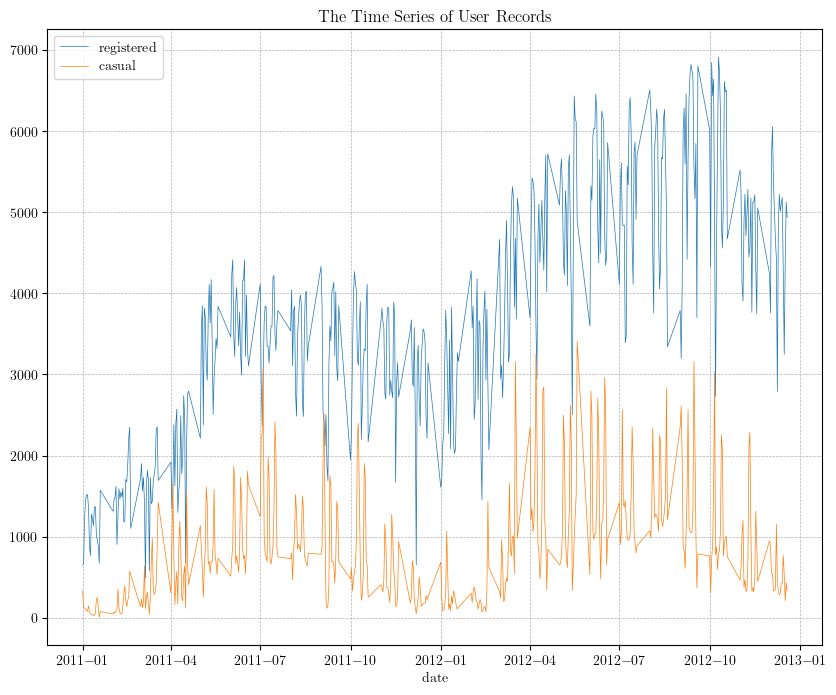

In [65]:
df_viz = yulu_rental_df.groupby('date')[['registered', 'casual']].sum()

df_viz_registered_casual_comparison = df_viz.plot(figsize=(10,8), linewidth=0.5)

plt.title('The Time Series of User Records')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show();